In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
import operator

In [3]:
summary = pd.read_excel('XYZ-1.xlsx', 'summary')
df = pd.read_excel('XYZ-1.xlsx', 'Data')
demand = df[6:]

In [4]:
summary

,Lead time,starting stock,Probability,Demand_lead
0,9,2750,1,705
1,6,22500,1,3891
2,16,5200,1,2266
3,22,1400,1,785


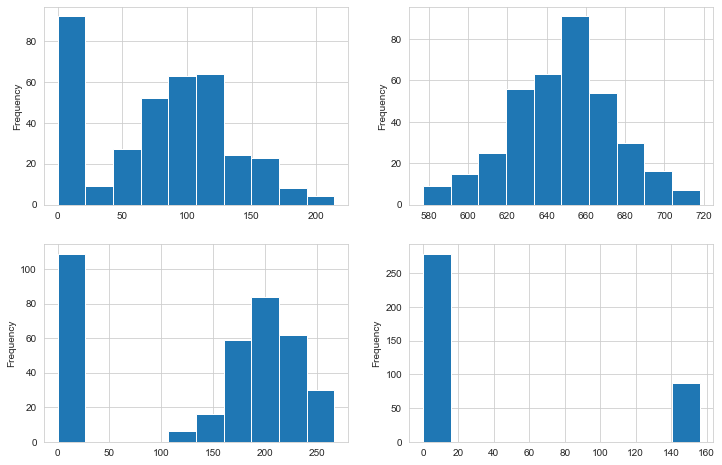

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
demand[1].plot.hist(ax=axes[0, 0])
demand[2].plot.hist(ax=axes[0, 1])
demand[3].plot.hist(ax=axes[1, 0])
demand[4].plot.hist(ax=axes[1, 1])

In [6]:
class Product:
    def __init__(self, i):
        """
        :type i: int - Product number
        """
        self.i = i
        self.lead_time = summary['Lead time'].iloc[i - 1]
        self.probability = summary['Probability'].iloc[i - 1]
        self.starting_stock = summary['starting stock'].iloc[i - 1]
        self.demand_lead = summary['Demand_lead'].iloc[i - 1]

        self.mean = np.mean([np.log(j) for j in demand[demand[i] > 0][i]])
        self.sd = np.std([np.log(j) for j in demand[demand[i] > 0][i]])

In [7]:
def daily_demand(mean, sd, probability):
    random_num = np.random.uniform(0, 1)
    if random_num > probability:
        return 0
    else:
        return np.exp(np.random.normal(mean, sd))

In [8]:
product_1 = Product(1)

In [9]:
def reple(M, product):
    inventory = product.starting_stock
    mean = product.mean
    sd = product.sd
    lead_time = product.lead_time
    probability = product.probability
    demand_lead = product.demand_lead

    q = 0
    stock_out = 0
    counter = 0
    order_placed = False
    # dictionary to store all the information
    data = {'inv_level': [], 'daily_demand': [], 'orders': [],'clossing' : []}
    u=0
    for day in range(1, 365):
        day_demand = daily_demand(mean, sd, probability)
        data['daily_demand'].append(day_demand)

        if day % lead_time == 0 or u==1:
            # Placing the order
            q = M - inventory + demand_lead
            if(u==1):
                q=q+M - inventory + demand_lead
            order_placed = True
            data['orders'].append(q)
        u=0
            
        if order_placed:
            counter += 1
        
        if counter == lead_time:
            # Restocking day
            inventory += q
            order_placed = False
            counter = 0
        p=inventory - day_demand
        if p >= 0:
            inventory -= day_demand
        elif p < 0:
            inventory = 0
            stock_out += 1
            day=day-lead_time-1
            u=1
        data['inv_level'].append(inventory)

    return data

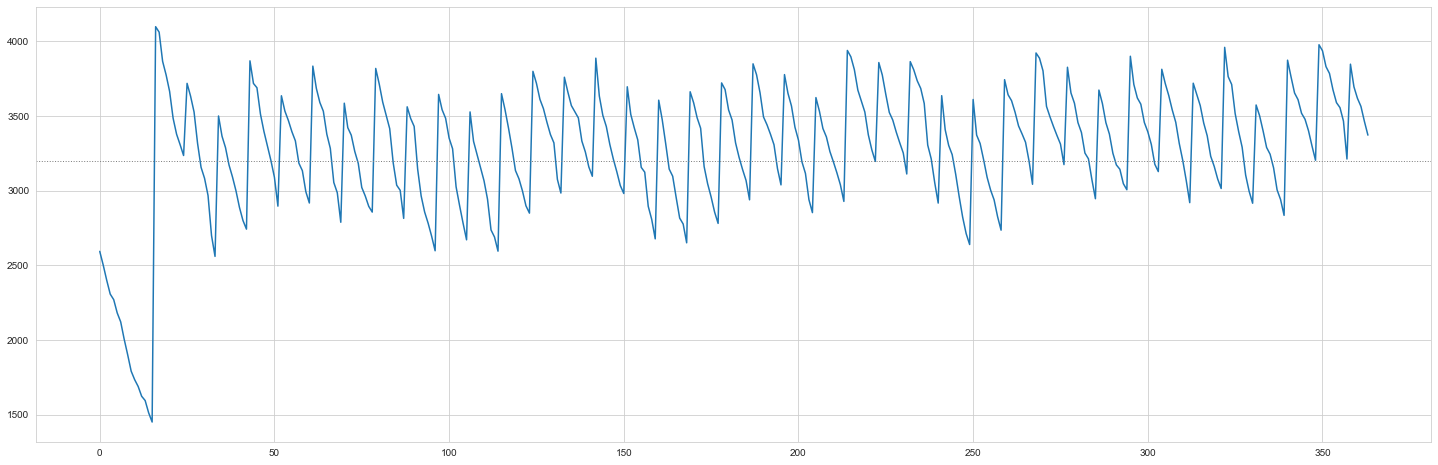

In [10]:
M=6000
data = reple(4000, product_1)
plt.figure(figsize=(25,8))
plt.plot(data['inv_level'])
plt.axhline(3200, linewidth=1, color="grey", linestyle=":")
plt.show()

In [11]:
print (data['inv_level'])

[2593.3731521872446, 2501.287523182256, 2399.5634211874644, 2307.1834286007665, 2269.821844489319, 2181.0130966585616, 2120.80326942143, 2004.4446682597993, 1900.4477027069654, 1790.475087692185, 1733.4546375879695, 1687.9687397661094, 1622.438627700654, 1593.8159262208756, 1511.6057061697666, 1449.7245858412448, 4098.792676206256, 4062.2580256480624, 3866.47302898246, 3775.552993907179, 3665.2528946609873, 3485.68968466392, 3378.106208961557, 3308.7567926994257, 3235.6757925746683, 3718.980393528178, 3633.5355025862273, 3527.1890294288864, 3317.452477764496, 3156.5651910069373, 3083.133984526653, 2967.6931739516463, 2699.304344715851, 2559.6437273232746, 3500.5138460884177, 3365.039175515558, 3288.648407316909, 3172.3887229760185, 3091.74770800238, 2998.9286044534456, 2887.428218766043, 2800.028272308054, 2742.247684183765, 3869.898753353392, 3718.4555528734973, 3689.6883725676926, 3513.513306700437, 3396.9717897134888, 3298.4566008107363, 3202.028652574911, 3090.1342807021683, 2896.3

In [12]:
print (data['orders'])

[2700.555331740201, 606.2073237937439, 986.019606471822, 1204.4861539115823, 835.1012466466082, 1069.086301592496, 870.3992314200382, 1118.813177430783, 885.9669834875522, 1143.152653506349, 1060.0080816379982, 1177.35209438758, 1054.982530895033, 905.3734880613451, 944.8690104109155, 817.1009896024334, 1008.8262677165967, 1098.6382701092066, 1042.2856151020542, 983.028710324641, 855.0763946004663, 927.2015512293297, 1081.3129434749644, 765.3270400565261, 846.5208592858535, 840.2836505677724, 1068.4470568806332, 1094.07543728045, 961.2521873935393, 782.3843513559523, 878.0379632467784, 1030.9930091755332, 804.2292848268389, 891.5900572524806, 984.9562241350568, 744.6239666814163, 1130.9346668792618, 830.6673256264262, 727.2058520182877, 857.4103780945361]


In [13]:
print (data['daily_demand'])

[156.6268478127555, 92.08562900498876, 101.72410199479155, 92.37999258669797, 37.3615841114475, 88.80874783075771, 60.20982723713198, 116.35860116163053, 103.99696555283398, 109.97261501478029, 57.0204501042155, 45.48589782186023, 65.53011206545531, 28.622701479778375, 82.21022005110909, 61.881120328521845, 51.487241375189505, 36.534650558193576, 195.784996665602, 90.92003507528145, 110.30009924619178, 179.56320999706722, 107.58347570236322, 69.34941626213151, 73.08100012475742, 122.9027228402344, 85.44489094195062, 106.34647315734085, 209.73655166439056, 160.88728675755866, 73.43120648028442, 115.44081057500672, 268.3888292357953, 139.66061739257657, 45.149487706678826, 135.47467057285982, 76.39076819864877, 116.25968434089064, 80.64101497363826, 92.81910354893442, 111.50038568740287, 87.39994645798876, 57.78058812428881, 76.83508474195582, 151.44320047989478, 28.76718030580471, 176.17506586725554, 116.54151698694855, 98.51518890275241, 96.42794823582511, 111.89437187274294, 193.77751

In [14]:
average=0
clossing = []
for i in range(364):
        average=average+data['daily_demand'][i]
        clossing.append(data['inv_level'][i]-data['daily_demand'][i])
average=average/365
ROP=average*product_1.lead_time

In [15]:
import csv

with open('predict.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['days','opening','clossing','ROP','smax', 'SL','Demand'])
    for i in range(364):   
        row_list=[[i+1,data['inv_level'][i],clossing[i],ROP ,M,average,data['daily_demand'][i]]]
        filewriter.writerows(row_list)
    filewriter.writerow(['EOQ'])
    for i in range(20):   
        row_list=[[data['orders'][i]]]
        filewriter.writerows(row_list)